In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! pip install -q kaggle

In [3]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                   title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                              Car Price Dataset                                 135KB  2025-01-26 19:53:28          19626        315  1.0              
abdulmalik1518/mobiles-dataset-2025                                   Mobiles Dataset (2025)                             20KB  2025-02-18 06:50:24           3545         68  1.0              
mahmoudelhemaly/students-grading-dataset                              Student Performance & Behavior Dataset            508KB  2025-02-17 17:38:46           3053         58  1.0              
himelsarder/coffee-shop-daily-revenue-pr

In [4]:
! kaggle datasets download -d ashishpatel26/facial-expression-recognitionferchallenge

Dataset URL: https://www.kaggle.com/datasets/ashishpatel26/facial-expression-recognitionferchallenge
License(s): copyright-authors
 80% 77.0M/96.6M [00:00<00:00, 269MB/s]
100% 96.6M/96.6M [00:00<00:00, 271MB/s]


In [5]:
! mv /content/facial-expression-recognitionferchallenge.zip /content/drive/MyDrive/Facial_Exp_Detection

In [6]:
%cd /content/drive/MyDrive/Facial_Exp_Detection
! pwd

/content/drive/MyDrive/Facial_Exp_Detection
/content/drive/MyDrive/Facial_Exp_Detection


In [8]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random

In [9]:
data = pd.read_csv('/content/MyDrive/MyDrive/Facial_Exp_Detection/fer2013/fer2013/fer2013.csv')

OSError: [Errno 107] Transport endpoint is not connected: '/content/MyDrive/MyDrive/Facial_Exp_Detection/fer2013/fer2013/fer2013.csv'

In [9]:
!ls /content/drive/MyDrive/Facial_Exp_Detection


ls: cannot access '/content/drive/MyDrive/Facial_Exp_Detection': No such file or directory


In [10]:
!ls -l /content/drive/MyDrive/MyDrive/


ls: cannot access '/content/drive/MyDrive/MyDrive/': No such file or directory


In [20]:
drive.flush_and_unmount()


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
! kaggle datasets download -d ashishpatel26/facial-expression-recognitionferchallenge

Dataset URL: https://www.kaggle.com/datasets/ashishpatel26/facial-expression-recognitionferchallenge
License(s): copyright-authors
 86% 83.0M/96.6M [00:00<00:00, 170MB/s]
100% 96.6M/96.6M [00:00<00:00, 159MB/s]


In [24]:
! mv /content/facial-expression-recognitionferchallenge.zip /content/drive/MyDrive/Facial_Exp_Detection

In [25]:
%cd /content/drive/MyDrive/Facial_Exp_Detection
!pwd

[Errno 20] Not a directory: '/content/drive/MyDrive/Facial_Exp_Detection'
/content
/content


In [26]:
!ls -l /content/drive/MyDrive/

total 98914
drwx------  3 root root      4096 Feb 28 15:09 'Colab Notebooks'
-rw-------+ 1 root root 101283289 Oct  9  2019  Facial_Exp_Detection


In [11]:
!rm /content/drive/MyDrive/Facial_Exp_Detection

rm: cannot remove '/content/drive/MyDrive/Facial_Exp_Detection': Is a directory


In [12]:
!mkdir /content/drive/MyDrive/Facial_Exp_Detection

mkdir: cannot create directory ‘/content/drive/MyDrive/Facial_Exp_Detection’: File exists


In [13]:
%cd /content/drive/MyDrive/Facial_Exp_Detection
!pwd

/content/drive/MyDrive/Facial_Exp_Detection
/content/drive/MyDrive/Facial_Exp_Detection


Data Preprocessing

In [16]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random

In [15]:
data = pd.read_csv('/content/drive/MyDrive/Facial_Exp_Detection/fer2013/fer2013/fer2013.csv')

In [17]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [18]:
data.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [19]:
data.emotion.value_counts()

,count
emotion,
3,8989
6,6198
4,6077
2,5121
0,4953
5,4002
1,547


In [20]:
data.Usage.value_counts()

,count
Usage,
Training,28709
PublicTest,3589
PrivateTest,3589


In [21]:
emotion_labels = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [22]:
def pixels_label_gen(pixels, labels):
  """
    Generator function that yields pairs of image data and corresponding labels.

    Args:
        pixels (list): List of strings representing the pixel intensities of images.
        labels (list): List of labels corresponding to the images.

    Yields:
        tuple: A tuple containing the 2D image containing (48, 48) pixels and label.

    """
  for pixel, label in zip(pixels, labels):
    #print(len(pixel.split(' ')), label)
    yield (np.array(pixel.split(' ')).reshape(48, 48).astype('float32'), label)

In [23]:
def show_image(data, rows):
  """
    Display images from the given dataset.

    Args:
        data (DataFrame): Pandas DataFrame containing the image pixel data and corresponding labels.
        rows (int): Number of rows of images to display.

    """
  # Create a figure with specified size
  fig = plt.figure(1, (14, 14))
  i=0 # Counter for the images
  data_generator = pixels_label_gen(data['pixels'], data['emotion'])
  limit = rows * 7 - 1 # Calculate the limit of images to display based on the number of rows
  for pixels, label in data_generator:
    i = i+1
    #print(pixels.shape)
    ax = plt.subplot(7, 7, i)
    ax.imshow(pixels, cmap='gray') # Display the image
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(emotion_labels[label]) # Set the title of the subplot as the corresponding emotion label
    plt.tight_layout()
    if i > limit:
      break # Break the loop if the limit of images is reached

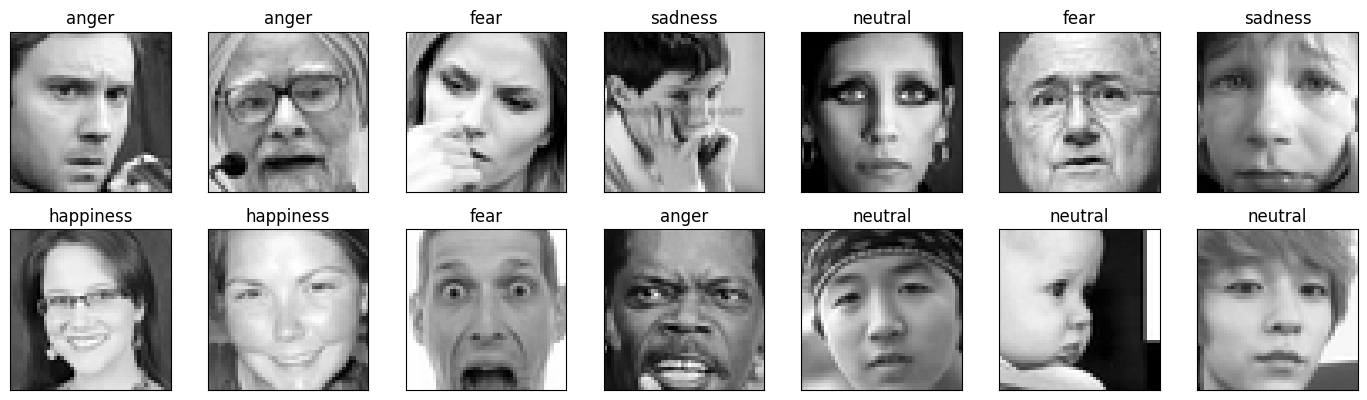

In [24]:
show_image(data, 2)

In [25]:
def horizontal_flip(image):
  """
    Perform a horizontal flip on the input image.

    Args:
        image (numpy.ndarray): Input image to be flipped.

    Returns:
        numpy.ndarray: Flipped image.

    """
  return cv2.flip(image, 1) # Perform horizontal flip using cv2.flip

In [26]:
def vertical_flip(image):
  """
    Perform a vertical flip on the input image.

    Args:
        image (numpy.ndarray): Input image to be flipped.

    Returns:
        numpy.ndarray: Flipped image.

    """
  return cv2.flip(image, 0) # Perform vertical flip using cv2.flip

In [27]:
def rotation(image, angle):
  """
    Apply a rotation transformation to the input image.

    Args:
        image (numpy.ndarray): Input image to be rotated.
        angle (float): Maximum angle of rotation in degrees.

    Returns:
        numpy.ndarray: Rotated image.

    """
  # Generate a random angle within the specified range
  angle = int(random.uniform(-angle, angle))

  # Get the height and width of the image
  h, w = image.shape[:2]

  # Compute the rotation matrix using the center of the image and the specified angle
  M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)

  # Apply the rotation transformation to the image
  image = cv2.warpAffine(image, M, (w, h))

  return image

In [28]:
def augment_images(img, type):

  """
    Apply augmentation techniques to the input image based on the specified type.

    Args:
        img (numpy.ndarray): Input image to be augmented.
        type (str): Type of augmentation to apply ('hflip', 'vflip', or 'rotation').

    Returns:
        numpy.ndarray: Augmented image.

    """

  if type=='hflip':
     # Apply horizontal flip transformation
    return horizontal_flip(img)

  elif type=='vflip':
    # Apply vertical flip transformation
    return vertical_flip(img)

  else:
    # Apply rotation transformation with a random angle within the range of -90 to 90 degrees
    angle = random.uniform(-90, 90)
    return rotation(img, angle)

In [29]:
def gen_balance_data(data, max_img_cnt, img_cnt, label):
  """
    Generate balanced data by augmenting the input data.

    Args:
        data (pandas.DataFrame): Input data to be balanced.
        max_img_cnt (int): Maximum number of images desired.
        img_cnt (int): Number of images in the input data.
        label (str): Label to assign to the augmented images.

    Returns:
        numpy.ndarray: Augmented images.

  """
  req_imgs = max_img_cnt - img_cnt
  #print('req_imgs', req_imgs)

  # Select randomly sampled samples if required images are less than or equal to current images
  randomly_selected_samples = data
  if req_imgs <= img_cnt:
    randomly_selected_samples = data.sample(n=req_imgs)
  else:
    factor = max_img_cnt // img_cnt # Number of times to repeat the input data (greater than 2)
    remains = max_img_cnt - img_cnt * factor # Remaining number of images to sample
    # Concatenate multiple copies of the input data and sample additional images
    randomly_selected_samples = pd.concat([pd.concat([data] * (factor-1), ignore_index = False, axis = 0) , data.sample(n=remains)], axis=0, ignore_index = False)
    #print('randomly_selected_samples.shape ', randomly_selected_samples.shape)


  #horizontal, vertical, right rotation
  random_imgs = randomly_selected_samples['pixels']

  # Initialize the array to store augmented images
  aug_imgs = np.full((req_imgs, 3), "", dtype=object)

  aug_types = ['hflip', 'vflip', 'rotation'] # Augmentation types

  k = 0 # Index to iterate through augmentation types
  #print(aug_imgs.shape, randomly_selected_samples.shape)

  for i, img in enumerate(random_imgs):
    if i%img_cnt==0 and i>0:
      #print('aug type selected {} i = {}'.format(aug_types[k], i))
      s = len(aug_types)
      k = (k+1)%s # Cycle through the augmentation types

    # Apply augmentation to the image based on the selected augmentation type
    flip_img = augment_images(np.array(img.split(' ')).reshape(48, 48).astype('float32'), aug_types[k])
    flip_img_pixels = flip_img.reshape(2304, ).astype(str)
    flip_img_str = ' '.join(flip_img_pixels)

    # Store the augmented image, label, and category in the array
    aug_imgs[i][0] = label
    aug_imgs[i][1] = flip_img_str
    aug_imgs[i][2] = "Training"

  return aug_imgs


In [30]:
def balance_data(data):
  """
    Balance the data by generating additional samples for classes with fewer samples.

    Args:
        data (pandas.DataFrame): Input data containing emotion labels and image pixels.

    Returns:
        pandas.DataFrame: Balanced data with additional samples.

    """

  bal_data = data.copy() # Create a copy of the input data

  max_class_count = data['emotion'].value_counts().max() # Find the maximum count of samples among all emotion classes

  emotions = list(data.emotion.unique()) # Get the list of unique emotion classes

  #print(max_class_count)
  for cl in emotions:
    #print(cl)
    cl_data = data[data['emotion']==cl] # Filter data for the current emotion class

    #print(cl_data.head())
    class_count = cl_data['emotion'].count() # Count the number of samples for
    #print(class_count)

    if class_count < max_class_count:
      # Generate additional samples for the current class using gen_balance_data function
      aug_data = gen_balance_data(cl_data, max_class_count, class_count, cl)

       # Create a DataFrame from the augmented data and append it to the balanced data
      df = pd.DataFrame(aug_data, columns=['emotion', 'pixels', 'Usage'])
      #print(df.shape)
      bal_data = pd.concat([bal_data, df], ignore_index=True)

  return bal_data

In [31]:
data_frame = balance_data(data)
print(data_frame.shape)

(62923, 3)


In [32]:
data_frame.to_csv('/content/drive/MyDrive/Facial_Exp_Detection/fer2013/fer2013/fer2013_balanced.csv', index=False)

In [33]:
data_frame.Usage.value_counts()

,count
Usage,
Training,55745
PublicTest,3589
PrivateTest,3589


In [34]:
train_data = data_frame[data_frame['Usage']=='Training'] # training set
valid_data = data_frame[data_frame['Usage']=='PublicTest'] # validation set
test_data = data_frame[data_frame['Usage']=='PrivateTest'] # test set

In [35]:
train_data.emotion.value_counts()

,count
emotion,
1,8878
5,8158
0,8031
2,7965
6,7756
4,7742
3,7215


The DATASET IS BALANCED NOW

In [49]:
import math
import numpy as np
import pandas as pd
import cv2

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from keras import optimizers
from keras.models import Model
from keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D, GlobalMaxPool2D
from keras.layers import Dropout, BatchNormalization, Activation
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [44]:
data_frame = pd.read_csv('/content/drive/MyDrive/Facial_Exp_Detection/fer2013/fer2013/fer2013_balanced.csv')

In [45]:
train_data = data_frame[data_frame['Usage']=='Training'] # Training set
valid_data = data_frame[data_frame['Usage']=='PublicTest'] # Validation set
test_data = data_frame[data_frame['Usage']=='PrivateTest'] # Test set

In [46]:
def get_img_dim(string):
  """
    Convert a string representation of an image to a NumPy array.

    Args:
        string (str): String representation of an image, where pixel values are separated by spaces.

    Returns:
        numpy.ndarray: NumPy array representing the image.

    """
  return np.array(string.split(' ')).reshape(48, 48).astype('float32')

In [47]:
# Convert the pixel values in the 'pixels' column of the train_data DataFrame into NumPy arrays representing the images
# Assign the converted arrays to the X_train variable
X_train = train_data['pixels'].apply(get_img_dim)

# Assign the emotion labels from the 'emotion' column of the train_data DataFrame to the Y_train variable
Y_train = train_data['emotion']

# Convert the pixel values in the 'pixels' column of the valid_data DataFrame into NumPy arrays representing the images
# Assign the converted arrays to the X_valid variable
X_valid = valid_data['pixels'].apply(get_img_dim)

# Assign the emotion labels from the 'emotion' column of the valid_data DataFrame to the Y_valid variable
Y_valid = valid_data['emotion']

# Convert the pixel values in the 'pixels' column of the test_data DataFrame into NumPy arrays representing the images
# Assign the converted arrays to the X_test variable
X_test = test_data['pixels'].apply(get_img_dim)

# Assign the emotion labels from the 'emotion' column of the test_data DataFrame to the Y_test variable
Y_test= test_data['emotion']

In [50]:
# Normalize the pixel values in X_train, X_valid, and X_test by dividing them by 255
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

In [51]:
label_encoder = LabelEncoder()

# Encode the emotion labels in Y_train using label_encoder
Y_train = label_encoder.fit_transform(Y_train)
# Convert the encoded labels to one-hot encoded vectors
Y_train = to_categorical(Y_train)

# Encode the emotion labels in Y_valid using label_encoder
Y_valid = label_encoder.fit_transform(Y_valid)
# Convert the encoded labels to one-hot encoded vectors
Y_valid = to_categorical(Y_valid)

# Encode the emotion labels in Y_test using label_encoder
Y_test = label_encoder.fit_transform(Y_test)
# Convert the encoded labels to one-hot encoded vectors
Y_test = to_categorical(Y_test)

In [52]:
print('X_train.shape {},  Y_train.shape {}'.format(X_train.shape, Y_train.shape))
print('X_valid.shape {},  Y_valid.shape {}'.format(X_valid.shape, Y_valid.shape))
print('X_test.shape {},  Y_test.shape {}'.format(X_test.shape, Y_test.shape))

X_train.shape (55745,),  Y_train.shape (55745, 7)
X_valid.shape (3589,),  Y_valid.shape (3589, 7)
X_test.shape (3589,),  Y_test.shape (3589, 7)


In [54]:
def get_RGB_img(img):
  """
    Converts a grayscale image to RGB format.

    Parameters:
    - img: Grayscale image to be converted.

    Returns:
    - RGB image.
    """
  return cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

In [55]:
x_train, y_train = np.stack(X_train.apply(lambda x:  cv2.cvtColor(x, cv2.COLOR_GRAY2RGB))), Y_train

# Convert grayscale images in X_valid to RGB format and stack them into a 4D array
x_valid, y_valid = np.stack(X_valid.apply(lambda x:  cv2.cvtColor(x, cv2.COLOR_GRAY2RGB))), Y_valid

# Convert grayscale images in X_test to RGB format and stack them into a 4D array
x_test, y_test = np.stack(X_test.apply(lambda x:  cv2.cvtColor(x, cv2.COLOR_GRAY2RGB))), Y_test

In [56]:
print('x_train.shape {},  y_train.shape {}'.format(x_train.shape, y_train.shape))
print('x_valid.shape {},  y_valid.shape {}'.format(x_valid.shape, y_valid.shape))
print('x_test.shape {},  y_test.shape {}'.format(x_test.shape, y_test.shape))

x_train.shape (55745, 48, 48, 3),  y_train.shape (55745, 7)
x_valid.shape (3589, 48, 48, 3),  y_valid.shape (3589, 7)
x_test.shape (3589, 48, 48, 3),  y_test.shape (3589, 7)


In [36]:
!pip install scikit-plot

In [62]:
!pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 91.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, but you have scipy 1.9.3 which is incompatible.
jaxlib 0.4.33 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.
jax 0.4.33 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.
cvxpy 1.6.1 requires 

In [39]:
import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical

In [40]:
def build_net(optim):
    """
    Build a deep convolutional neural network model.

    Parameters:
    - optim: The optimizer used for training the model.

    Returns:
    - net: The built deep convolutional neural network model.

    Conv2D layers' arguments:

    filter: No. of filters to be applied
    kernel_zie: size of each filter.
    input_shape: Shape of input image. In our case it is (48, 48, 3)
    activation: ELU Activation function. It is a variant f ReLU activation function.
    padding: Here, 'same' means input and output shape will be same. Basically 0 padding
    kernel_initializer: 'he_normal' is used to initialize weights ( normal distribution )
    name: Name of resepective layer

    """
    num_classes = 7 # no. of emotion_labels
    net = Sequential(name='DCNN') #name of network or model

    # Dense Layer 1 ( Input Layer )
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(48, 48, 3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )

    # Batch normalization
    net.add(BatchNormalization(name='batchnorm_1'))

    # Dense Layer 2
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )

    # Batch normalization
    net.add(BatchNormalization(name='batchnorm_2'))

    # Max Pooling
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))

    # Droputs applied to reduce overfitting
    # 40% of the input units will be randomly set to 0 during training.
    net.add(Dropout(0.4, name='dropout_1'))

    # Dense Layer 3
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )

    # Batch normalization
    net.add(BatchNormalization(name='batchnorm_3'))

    # Dense Layer 4
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
         )

    # Batch normalization
    net.add(BatchNormalization(name='batchnorm_4'))

    # Max Pooling
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))

    # 40% Dropouts
    net.add(Dropout(0.4, name='dropout_2'))

    # Dense Layer 5
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )

    # Batch normalization
    net.add(BatchNormalization(name='batchnorm_5'))

    # Dense Layer 6
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )

    # Batch normalization
    net.add(BatchNormalization(name='batchnorm_6'))

    # Max pooling
    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    # 50% dropouts
    net.add(Dropout(0.5, name='dropout_3'))

    #Flatten the 2D convolutions
    net.add(Flatten(name='flatten'))

    # Dense Layer 7 containing 128 neurons
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )

    # Batch normalization
    net.add(BatchNormalization(name='batchnorm_7'))

    # 60% dropouts
    net.add(Dropout(0.6, name='dropout_4'))

    # Dense Layer 8 - Output Layer containing 7 neurons that must be equal to the number of classes
    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )

    # Compile the model
    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )

    #net.summary()

    return net

In [41]:
# Create an EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',            # Metric to monitor for early stopping
    min_delta=0.00005,                 # Minimum change in the monitored metric to be considered as improvement
    patience=11,                       # Number of epochs with no improvement after which training will be stopped
    verbose=1,                         # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
    restore_best_weights=True          # Whether to restore model weights from the epoch with the best monitored metric
)

# Create a ReduceLROnPlateau callback
lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',            # Metric to monitor for learning rate adjustment
    factor=0.5,                        # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=7,                        # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7,                       # Lower bound on the learning rate
    verbose=1                          # Verbosity mode. 0 = silent, 1 = update messages
)

# Combine the callbacks into a list
callbacks = [early_stopping, lr_scheduler]

In [59]:
batch_size = 32
epochs = 50
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

model = build_net(optims[1])
history = model.fit(
    x_train, y_train, batch_size=batch_size,
    validation_data=(x_valid, y_valid),
    steps_per_epoch=len(x_train) // batch_size,  # ✅ Fix applied here
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/50
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 62s 25ms/step - accuracy: 0.2878 - loss: 2.0784 - val_accuracy: 0.4795 - val_loss: 1.4113 - learning_rate: 0.0010
Epoch 2/50
   1/1742 ━━━━━━━━━━━━━━━━━━━━ 3:05:45 6s/step - accuracy: 0.0000e+00 - loss: 1.9764

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1742/1742 ━━━━━━━━━━━━━━━━━━━━ 8s 671us/step - accuracy: 0.0000e+00 - loss: 1.9764 - val_accuracy: 0.4857 - val_loss: 1.4045 - learning_rate: 0.0010
Epoch 3/50
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 61s 24ms/step - accuracy: 0.4928 - loss: 1.3472 - val_accuracy: 0.5227 - val_loss: 1.2857 - learning_rate: 0.0010
Epoch 4/50
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.0000e+00 - loss: 2.0318 - val_accuracy: 0.5224 - val_loss: 1.2920 - learning_rate: 0.0010
Epoch 5/50
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.5492 - loss: 1.1929 - val_accuracy: 0.5525 - val_loss: 1.1888 - learning_rate: 0.0010
Epoch 6/50
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.0000e+00 - loss: 1.5409 - val_accuracy: 0.5520 - val_loss: 1.1907 - learning_rate: 0.0010
Epoch 7/50
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.5875 - loss: 1.0968 - val_accuracy: 0.5832 - val_loss: 1.1047 - learning_rate: 0.0010
Epoch 8/50
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accur

In [61]:
# Saving model and weights
model_json = model.to_json()
with open("/content/drive/MyDrive/Facial_Exp_Detection/fer2013/model_cnn.json", "w") as json_file:
    json_file.write(model_json)

model.save("/content/drive/MyDrive/Facial_Exp_Detection/fer2013/model_cnn.h5")

In [62]:
def plot_loss_acc_graphs(history):
  # Set the style for the plots
  sns.set()

  # Create a figure with two subplots for accuracy and loss
  fig = pyplot.figure(0, (12, 4))

  # Plot the training and validation accuracy
  ax = pyplot.subplot(1, 2, 1)
  sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
  sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
  pyplot.title('Accuracy')
  pyplot.tight_layout()

  # Plot the training and validation loss
  ax = pyplot.subplot(1, 2, 2)
  sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
  sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
  pyplot.title('Loss')
  pyplot.tight_layout()

  # Save the figure as 'epoch_history_dcnn.png' and display the plot
  pyplot.savefig('epoch_history_vgg.png')
  pyplot.show()

In [63]:
def plot_confusion_matrix(model, x_test, y_test, filename):
  # Predict class labels for the test dataset using the loaded model
  yhat_test = np.argmax(model.predict(x_test), axis=1)

  # Plot the confusion matrix using scikit-plot
  scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_test, figsize=(7,7))

  # Save the plotted confusion matrix as an image
  pyplot.savefig(filename)

  # Calculate and print the total number of wrong validation predictions
  print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_test)}\n\n')

  # Generate a classification report based on true and predicted class labels
  print(classification_report(np.argmax(y_test, axis=1), yhat_test))


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step
total wrong validation predictions: 1113


              precision    recall  f1-score   support

           0       0.58      0.64      0.61       491
           1       0.88      0.80      0.84        55
           2       0.60      0.50      0.54       528
           3       0.90      0.84      0.87       879
           4       0.54      0.53      0.54       594
           5       0.77      0.86      0.81       416
           6       0.64      0.71      0.67       626

    accuracy                           0.69      3589
   macro avg       0.70      0.70      0.70      3589
weighted avg       0.69      0.69      0.69      3589



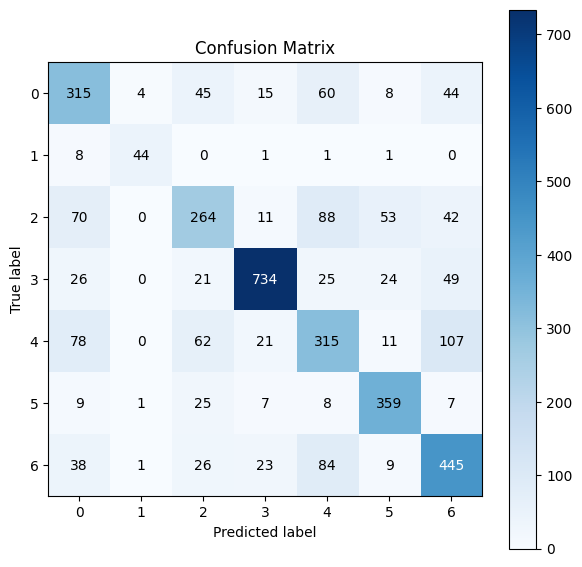

In [64]:
plot_confusion_matrix(model, x_test, y_test, "confusion_matrix_dcnn.png")